In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
#import tensorflow_addons as tfa
from tensorflow.keras import datasets, layers, models, preprocessing

In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 495839009445890453
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2342210200460300532
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13659379261430403072
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7445255296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2294964227092611548
physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
# train parameter

max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20
BATCH_SIZE =500

# 데이터 준비

In [4]:
def load_data():
    #load data
    # start_char=1, oov_char=2, index_from=3
    (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)

    # Pad sequences with max_len
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
    return (X_train, y_train), (X_test, y_test)
(X_train, y_train), (X_test, y_test) = load_data()

In [5]:
np.count_nonzero(X_train == 2)  # oov_char 종류 

214834

# 모델 준비

In [6]:
def build_model():
    
    #Input - Emedding Layer
    # the model will take as input an integer matrix of size (batch, input_length)
    # the model will output dimension (input_length, dim_embedding)
    # the largest integer in the input should be no larger
    # than n_words (vocabulary size).
    
    model = models.Sequential(
        [
            keras.layers.Embedding(n_words, dim_embedding, input_length=max_len),
            keras.layers.Dropout(0.3),
            
            #takes the maximum value of either feature vector from each of the n_words features
            keras.layers.GlobalMaxPooling1D(),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid')
        ]
    )
    
    return model
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 256)          2560000   
_________________________________________________________________
dropout (Dropout)            (None, 200, 256)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
______________________________________________

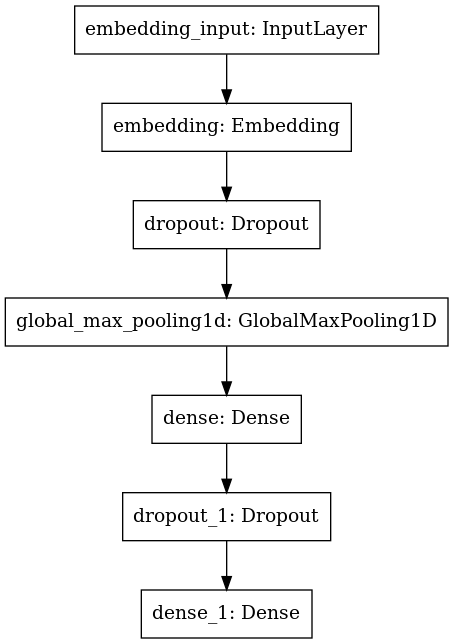

In [10]:
tf.keras.utils.plot_model(model, to_file="model.png")

#  학습

In [11]:
model.compile(optimizer = "adam", loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

history = model.fit(X_train, y_train,
 epochs= EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_test, y_test)
)

Epoch 1/20
50/50 [==============================] - 4s 71ms/step - loss: 0.6723 - accuracy: 0.6410 - val_loss: 0.6299 - val_accuracy: 0.8199
Epoch 2/20
50/50 [==============================] - 3s 70ms/step - loss: 0.4609 - accuracy: 0.8384 - val_loss: 0.3665 - val_accuracy: 0.8574
Epoch 3/20
50/50 [==============================] - 3s 68ms/step - loss: 0.2813 - accuracy: 0.8855 - val_loss: 0.3055 - val_accuracy: 0.8744
Epoch 4/20
50/50 [==============================] - 3s 69ms/step - loss: 0.2210 - accuracy: 0.9143 - val_loss: 0.2901 - val_accuracy: 0.8786
Epoch 5/20
50/50 [==============================] - 3s 68ms/step - loss: 0.1755 - accuracy: 0.9356 - val_loss: 0.2877 - val_accuracy: 0.8780
Epoch 6/20
50/50 [==============================] - 3s 69ms/step - loss: 0.1365 - accuracy: 0.9547 - val_loss: 0.2922 - val_accuracy: 0.8745
Epoch 7/20
50/50 [==============================] - 3s 69ms/step - loss: 0.1077 - accuracy: 0.9661 - val_loss: 0.3100 - val_accuracy: 0.8678
Epoch 8/20
50

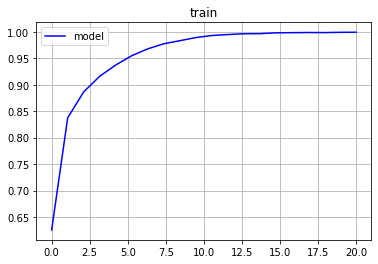

In [9]:
from matplotlib import pyplot as plt

accuracy = history.history['accuracy']

plt.plot(np.linspace(0, EPOCHS,  EPOCHS), accuracy,
             color='blue', label='model')

plt.title('train')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


50/50 [==============================] - 1s 17ms/step - loss: 0.4920 - accuracy: 0.8496

Test score: 0.49199149012565613
Test accuracy: 0.849560022354126
